<a href="https://colab.research.google.com/github/supratim58/Titanic_Dataset_Exploratory_Data_Analysis/blob/main/Titanic_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset: Exploratory Data Analysis

<font color=red>The purpose of this notebook is to analyze the well-known Titanic dataset obtained from Kaggle.

<font color=green>Our goal is to address the following questions through our analysis:


*   Passenger demographics on the Titanic (age, gender, class).
*   Origins of the Titanic passengers.
*   Identification of passengers traveling alone or with family.
*   Factors influencing survival during the sinking.

<font color=red> Basics of Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv("titanic.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above, we see that the dataset is missing a lot of information in for the **Cabin** column. We'll need to deal with that when we go about using the cabin data.

Other information seems to be complete, except some **Age** entries.

## Data-Visualization

<Axes: >

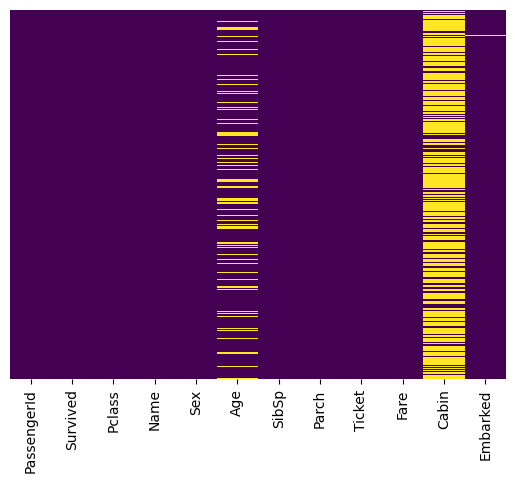

In [5]:
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font color=green>The describe method in pandas provides valuable summary statistics for the dataset offering quick insights.

<font color=red>By examining the Survived column, where 1 indicates survival and 0 represents death, we can determine the overall survival rate. The mean value indicates that approximately 38% of the individuals in the dataset survived the sinking.

<Axes: xlabel='Survived', ylabel='count'>

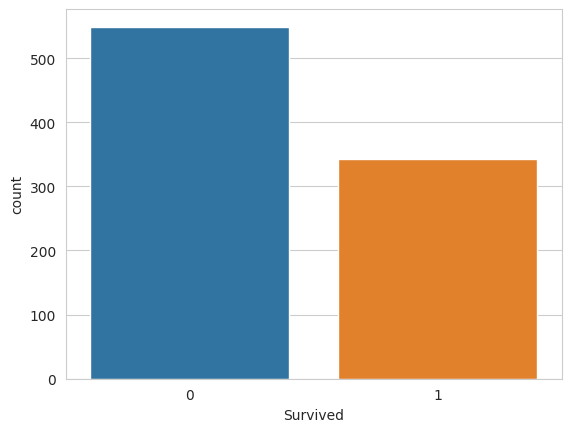

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

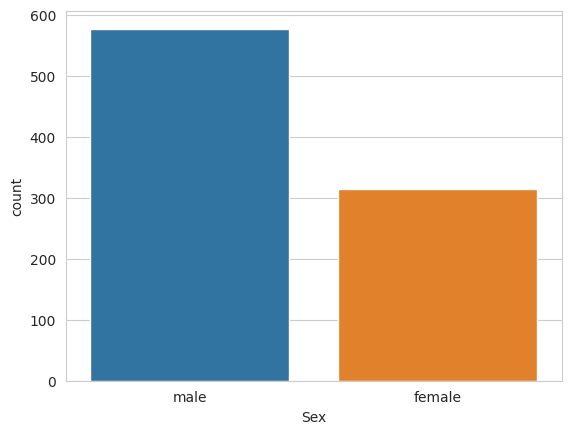

In [8]:
sns.countplot(x='Sex', data=titanic_df)

<Axes: xlabel='Survived', ylabel='count'>

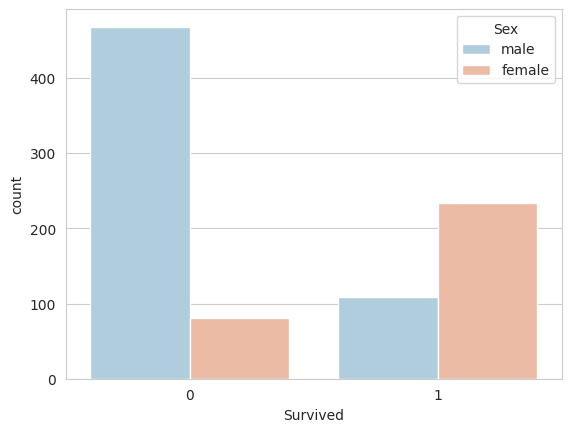

In [9]:
sns.countplot(x='Survived', hue='Sex', data=titanic_df, palette='RdBu_r')

We analysis that, no. of survived female passenger is more than no. of survived male passenger.

<Axes: xlabel='Pclass', ylabel='count'>

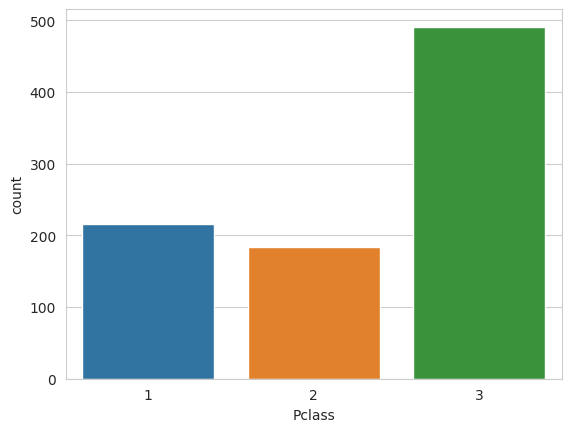

In [10]:
sns.countplot(x='Pclass', data=titanic_df)

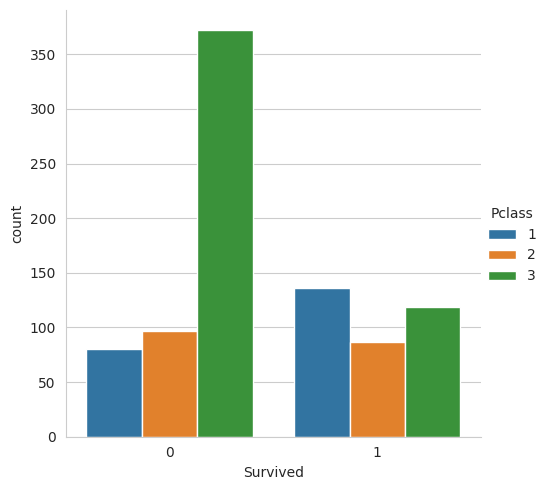

In [11]:
sns.catplot(x='Survived', hue='Pclass', data=titanic_df, kind='count')

As we seem, it appears that lower-class passengers had a lower likehood of survival.

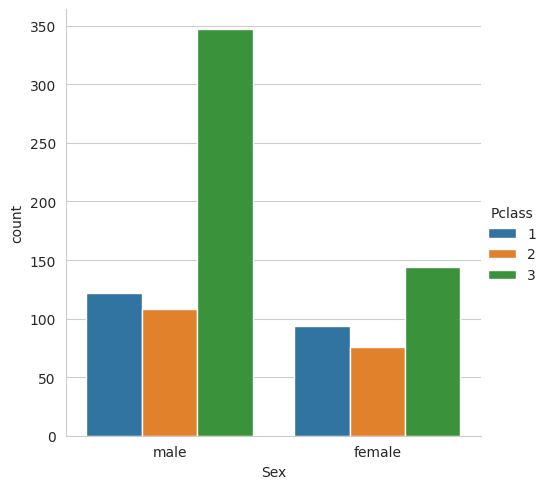

In [12]:
sns.catplot(x='Sex', hue='Pclass', data=titanic_df, kind='count')

<font color=blue> However, considering that the third class had a higher proportion of men compared to women (and children), it is worth nothing the famous protocol "Women and children first!" followed by the ship's administration when allocating lifeboat spots. This protocol prioritized women and children for the lifeboats during the Titanic's evacuation process.

<Axes: >

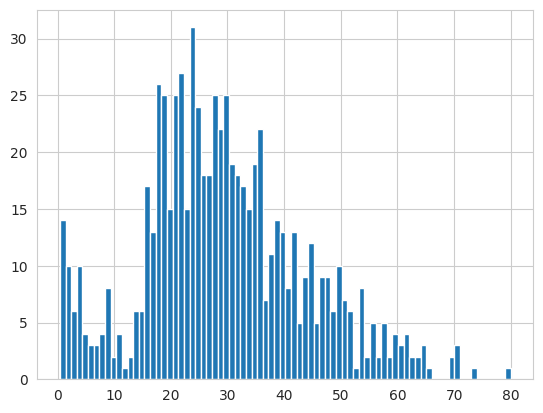

In [13]:
titanic_df['Age'].hist(bins=80)

<Axes: >

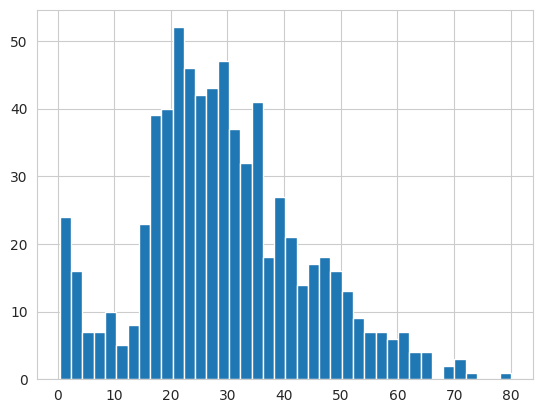

In [14]:
titanic_df['Age'].hist(bins=40)

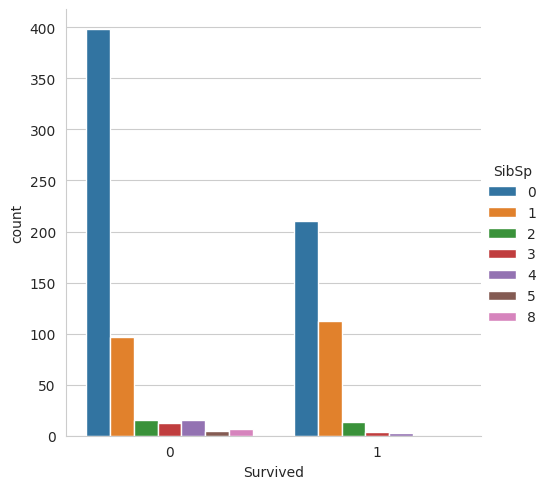

In [15]:
sns.catplot(x='Survived', hue='SibSp', data=titanic_df, kind='count')

<font color = blue>The attribute "Embarked" provides information about the passengers port of embarkation, with "C" representing Cherbourg, "Q" representing Queenstown and "S" representing Southampton.

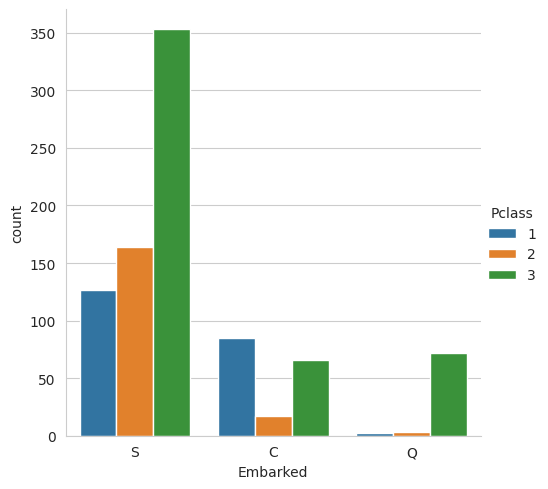

In [16]:
sns.catplot(x='Embarked', hue='Pclass', data=titanic_df, kind='count')

<font color = blue>The majority of passengers, including notable characters like Jack and Rose from the movie, boarded the Titanic at Southampton. Interestingly, there were very few first or second-class passengers who embarked from Queenstown. This observation provides insight into the socio-economic status of the population in Queenstown during that time.

## Data Cleaning

In [17]:
titanic_df['Age'].mean()

29.69911764705882

In [18]:
titanic_df.groupby(by='Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<font color = blue>These mean values clearly demonstrate that first class passengers were predominantly from the middle age groups. On the other hand, second and third-class passengers had a higher proportion of children and fewer older individuals.

In [19]:
# Here we make a function to fill the missing ages with the mean values of ages

def m_age(c):
  Age=c[0]
  Pclass=c[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 38
    elif Pclass==2:
      return 29
    elif Pclass==3:
      return 25
  else:
    return(Age)

In [20]:
# Now we apply the function and modified ages are saved in 'Age'

titanic_df['Age']=titanic_df[['Age', 'Pclass']].apply(m_age, axis=1)

<Axes: >

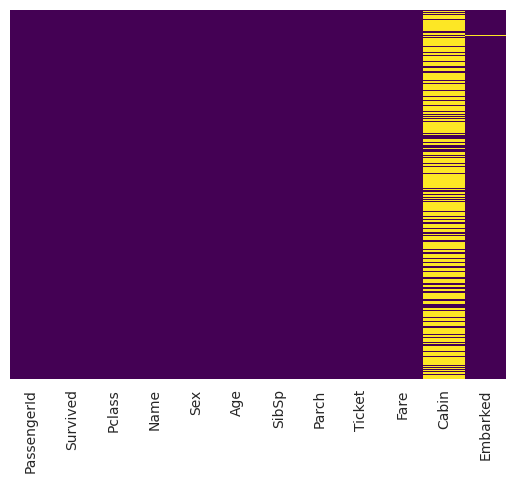

In [21]:
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
titanic_df.drop('Cabin', axis=1, inplace=True)

<Axes: >

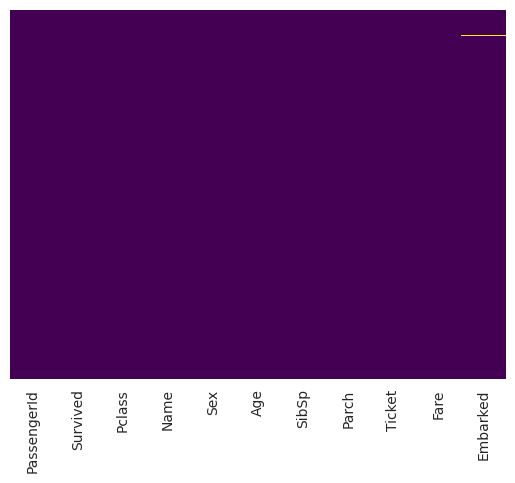

In [23]:
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
titanic_df=titanic_df.dropna() # drop the all empty entries

<Axes: >

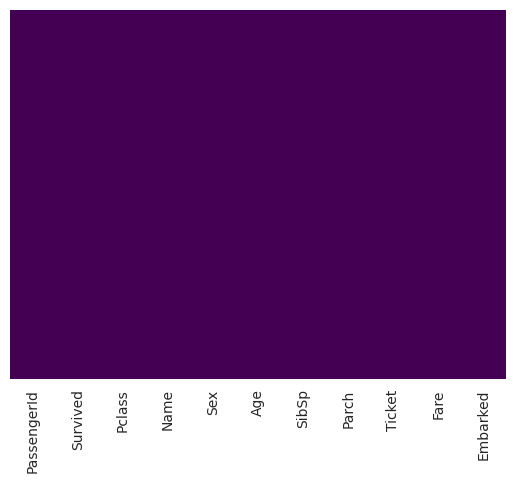

In [25]:
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now we have complete data to train the model.

In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
sex=pd.get_dummies(titanic_df['Sex'], drop_first=True)

In [28]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


if drop_first = False, then what happen?



```
sex=pd.get_dummies(titanic_df['Sex'], drop_first=False)
sex

     female   male
 0       0       1
 1       1       0
 2       1       0
 3       1       0
 4       0       1
...    ...     ...
```



In [29]:
embark=pd.get_dummies(titanic_df['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [30]:
titanic_df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

<ipython-input-30-22e675a2d0a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)


In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
titanic_df=pd.concat([titanic_df, sex, embark], axis=1)

In [33]:
titanic_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,25.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


## Classifications of Model

<font size = 5, color = red> Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic_df.drop(('Survived'), axis=1), titanic_df['Survived'], test_size=0.30, random_state=101) # Random_state is used to control the randomness of the data-splitting process

In [36]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [37]:
predictions=model.predict(X_test)

In [38]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [39]:
accuracy=accuracy_score(Y_test, predictions)

In [40]:
accuracy

0.8277153558052435

In [41]:
cm=confusion_matrix(Y_test, predictions)

In [42]:
cm

array([[149,  14],
       [ 32,  72]])